In [3]:
import tweepy
from textblob import TextBlob
import jsonpickle
import pandas as pd
import json

In [5]:
CONSUMER_KEY = 'poJVXF1Bj0ZFSNTftumHiv6WB'
CONSUMER_SECRET = 'Q9m2j7hpL2rtk2aNyzyeXUKLVrobwo87fCv9RIzNzMql9YmhzU'
ACCESS_KEY = '1334436583819264000-kM2WLC7N8SFxOBt6rLljdmtnSpfPrE'
ACCESS_SECRET = 'JvGYPAG5trpA0p8dZF03VM31tBX5ffvLnccocdtw47VA0'


auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
auth.secure = True
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:

searchQuery = 'coronavirus'
retweet_filter='-filter:retweets'

q=searchQuery+retweet_filter
tweetsPerQry = 100
fName = 'tweets.txt'
sinceId = None

In [8]:
max_id = -1
maxTweets = 1000

tweetCount = 0
print("Downloading max {0} tweets".format(maxTweets))
with open(fName, 'w') as f:
    while tweetCount < maxTweets:
        tweets = []
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry, tweet_mode='extended')

                else:
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry,
                                        since_id=sinceId, tweet_mode='extended')
            else:
                if (not sinceId):
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry,
                                        max_id=str(max_id - 1), tweet_mode='extended')
                else:
                    new_tweets = api.search(q=q, lang ="en", count=tweetsPerQry,
                                        max_id=str(max_id - 1),
                                        since_id=sinceId, tweet_mode='extended')

            if not new_tweets:
                print("No more tweets found")
                break
            for tweet in new_tweets:
                f.write(str(tweet.full_text.replace('\n','').encode("utf-8"))+"\n")

            tweetCount += len(new_tweets)
            print("Downloaded {0} tweets".format(tweetCount))
            max_id = new_tweets[-1].id
                
        except tweepy.TweepError as e:
            # Just exit if any error
            print("some error : " + str(e))
            break
                
print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fName))

Downloaded 100 tweets
Downloaded 200 tweets
Downloaded 300 tweets
Downloaded 400 tweets
Downloaded 500 tweets
Downloaded 600 tweets
Downloaded 700 tweets
Downloaded 800 tweets
Downloaded 900 tweets
Downloaded 1000 tweets
Downloaded 1000 tweets, Saved to tweets.txt


In [9]:
import re

def clean(tweet):
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'@[A-Za-z0–9]+', '', tweet) 
    return tweet

def read_tweets(file_name):
    with open(file_name, 'r') as f:
        tweets = [clean(line.strip()) for line in f]
    f.close()
    return tweets

In [11]:
tweets = read_tweets(fName)
print(tweets[2])
print(TextBlob(tweets[2]).sentiment)

b"LOOK: Here's what a COVID vaccination record card will look like -- once you get a vaccine, you keep it in your wallet. 
Sentiment(polarity=0.0, subjectivity=0.0)


In [12]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

In [13]:
import numpy as np

tweet_polarity = np.zeros(len(tweets))
tweet_subjectivity = np.zeros(len(tweets))

for idx, tweet in enumerate(tweets):
    tweet_polarity[idx] = polarity(tweet)
    tweet_subjectivity[idx] = subjectivity(tweet)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

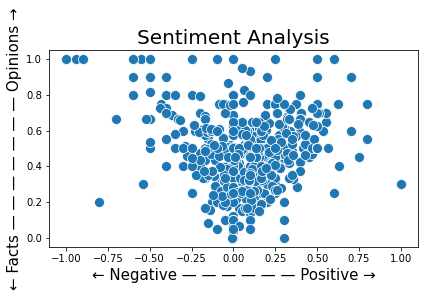

In [15]:

sns.scatterplot(tweet_polarity, # X-axis
                tweet_subjectivity,  # Y-axis
                s=100);


plt.title("Sentiment Analysis", fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.tight_layout()

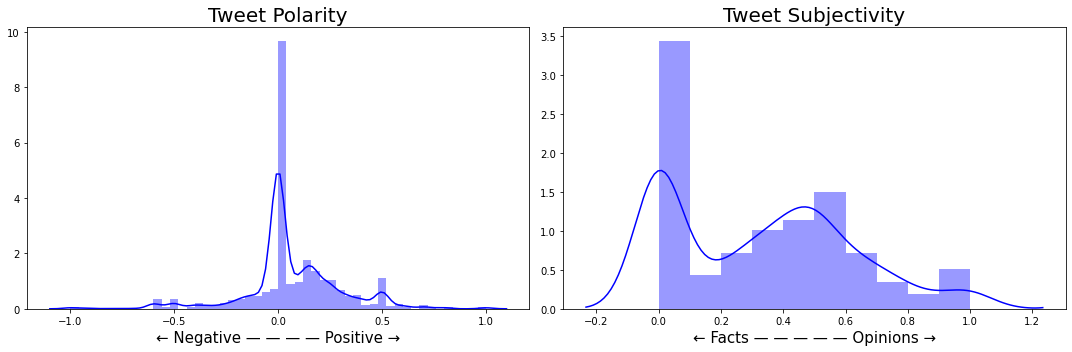

In [16]:

f, axs = plt.subplots(1, 2, figsize=(15,5))

sns.distplot(tweet_polarity, color="b", ax=axs[0])
axs[0].set_title("Tweet Polarity", fontsize = 20)
axs[0].set_xlabel('← Negative — — — — Positive →', fontsize=15)
sns.distplot(tweet_subjectivity, color="b", ax=axs[1])
axs[1].set_title("Tweet Subjectivity", fontsize = 20)
axs[1].set_xlabel('← Facts — — — — — Opinions →', fontsize=15)

plt.tight_layout()